# Data Scientist Associate Practical Exam Submission

Use this template to complete your analysis and write up your summary for submission.


## Task 1 
<p> For every column in the data:</p>
<ul>
    <li>a. State whether the values match the description given in the table above.</li>
    <li>b. State the number of missing values in the column.</li>
    <li>c. Describe what you did to make values match the description if they did not
    match.</li>
</ul>

### A- Data validation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

warnings.filterwarnings("ignore")


In [2]:
fitness_data = pd.read_csv("dataset/fitness_class_2212.csv")
fitness_data.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


In [3]:
fitness_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


* The data match exatly the description*

In [4]:
fitness_data["days_before"] = fitness_data["days_before"].str.strip("days")


In [5]:
fitness_data["days_before"] = fitness_data["days_before"].astype("int64")
fitness_data.describe()

,booking_id,months_as_member,weight,days_before,attended
count,1500.000000,1500.000000,1480.000000,1500.000000,1500.000000
mean,750.500000,15.628667,82.610378,8.346667,0.302667
std,433.157015,12.926543,12.765859,4.077938,0.459565
min,1.000000,1.000000,55.410000,1.000000,0.000000
25%,375.750000,8.000000,73.490000,4.000000,0.000000
50%,750.500000,12.000000,80.760000,9.000000,0.000000
75%,1125.250000,19.000000,89.520000,12.000000,1.000000
max,1500.000000,148.000000,170.520000,29.000000,1.000000


In [6]:
fitness_data.select_dtypes("object")

,day_of_week,time,category
0,Wed,PM,Strength
1,Mon,AM,HIIT
2,Sun,AM,Strength
3,Fri,AM,Cycling
4,Thu,AM,HIIT
...,...,...,...
1495,Fri,AM,HIIT
1496,Mon,AM,Strength
1497,Tue,AM,HIIT
1498,Sun,AM,Aqua


In [7]:
fitness_data.isna().sum()

booking_id           0
months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64

* Only the <code>weight</code> column has 20 missing values *

In [8]:
# Replace the missing values of weight column with the overall average weight
fitness_data["weight"].fillna(fitness_data["weight"].mean(), inplace=True)

In [9]:
fitness_data.isna().sum()

booking_id          0
months_as_member    0
weight              0
days_before         0
day_of_week         0
time                0
category            0
attended            0
dtype: int64

In [10]:
fitness_data["category"].value_counts()

category
HIIT        667
Cycling     376
Strength    233
Yoga        135
Aqua         76
-            13
Name: count, dtype: int64

In [11]:
fitness_data["category"] = fitness_data["category"].astype("category")

In [12]:
new_category = {"-":"unknown"}
fitness_data["category"] = fitness_data["category"].cat.rename_categories(new_categories=new_category)

In [13]:
fitness_data["category"].value_counts()

category
HIIT        667
Cycling     376
Strength    233
Yoga        135
Aqua         76
unknown      13
Name: count, dtype: int64

### Summary
<p> The data is nicely cleaned, only the <code>days_before</code> column has incorrect type to check the statistics along with the other features
such as the min and max. before I converted it to <code>int64</code> type, I deleted the "days" text appeared in some values using <code>column.str.strip()</code> method. Then I verified the min and values for the columns mentioned in the description, Also I checked the missing values, and based in my observation, only <code>weight</code> column has 20 missing values, replaced with the overall mean weight. </p>

## Task 2
<p>2. Create a visualization that shows how many bookings attended the class. Use the visualization to:</p>
<ul>
<li> a. State which category of the variable attended has the most observations </li>
<li> b. Explain whether the observations are balanced across categories of the variable attended </li>
</ul>

In [14]:
fitness_data.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


In [15]:
fitness_data["attended"].value_counts()

attended
0    1046
1     454
Name: count, dtype: int64

<Axes: xlabel='attended', ylabel='count'>

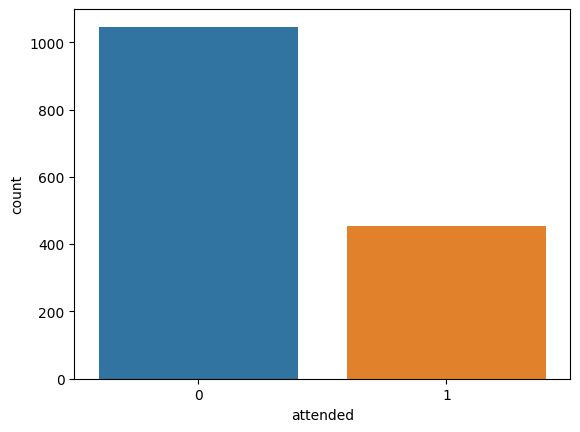

In [16]:
sns.countplot(data=fitness_data, x="attended")

<Axes: xlabel='attended', ylabel='count'>

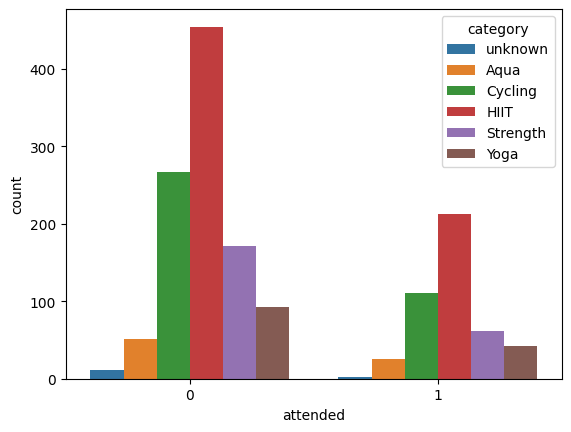

In [17]:
sns.countplot(data=fitness_data, x="attended", hue="category")

### Summary
<p> Based on the observations, more people do not often attend, Where we have 1046 not attended, and only 454 attended.</p>
<p> The visualation above shows the number of observations of variable attended for each gym category, we can clearly observe the unbalance across categories, where we have more non attended people.</p>

## Task 3
*Describe the distribution of the number of months as a member.*

In [21]:
fitness_data.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


<Axes: xlabel='months_as_member', ylabel='Count'>

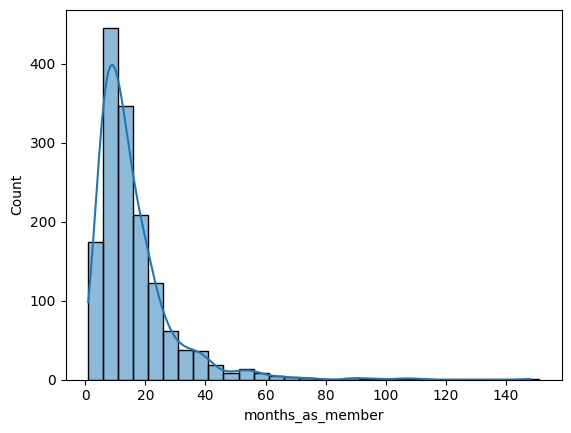

In [25]:
sns.histplot(data=fitness_data, x="months_as_member", binwidth=5, kde=True)

## Summary
From the histogram above, We have a lognormal like distribution,Most observations is between 0 and 60, means the monthly membership is between 0 and 60 month.

## Task 4
*The relationship between attendance and number of months as a member.*

<Axes: xlabel='months_as_member', ylabel='attended'>

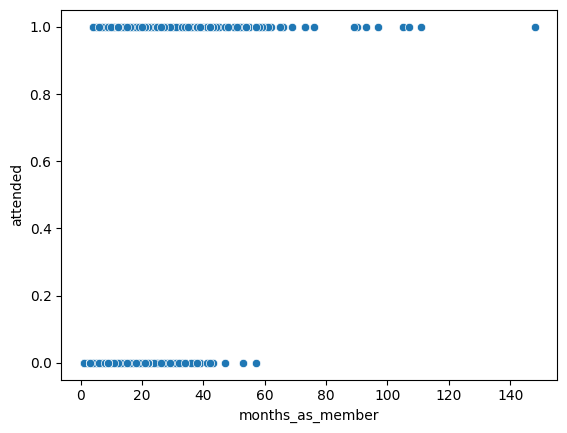

In [29]:
sns.scatterplot(data=fitness_data, x="months_as_member", y="attended")

In [30]:
fitness_data["attended"].corr(fitness_data["months_as_member"])

0.48552622327526346

## Task 5
*Write your description here*

## Task 6
*Write your description here*

In [18]:
# Start coding here... 

## Task 7
*Write your description here*

In [19]:
# Start coding here... 

## Task 8
*Write your description here*

## Task 9
*Write your description here*

In [20]:
# Start coding here... 

## Task 10
*Write your description here*

## ✅  When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review the grading rubric. Have you included everything that will be graded?
- Head back to the [Certification dashboard](https://app.datacamp.com/certification) to submit your practical exam